# PubMed API in Python

by Avery Fernandez

The PubMed API, part of NCBI's Entrez Programming Utilities (E-utilities), provides programmatic access to biomedical literature from the PubMed database, enabling retrieval of bibliographic data.

*This tutorial content is intended to help facilitate academic research.*

Please see the following resources for more information on API usage:
- Documentation
    - <a href="https://www.ncbi.nlm.nih.gov/books/NBK25501/" target="_blank">Entrez Programming Utilities Help</a>
    - <a href="https://www.ncbi.nlm.nih.gov/home/develop/api/" target="_blank">NCBI API Documentation</a>
- Terms
    - <a href="https://www.ncbi.nlm.nih.gov/home/about/policies/" target="_blank">NCBI Terms of Use</a>
    - <a href="https://www.ncbi.nlm.nih.gov/books/NBK25497/" target="_blank">NCBI Entrez Programming Rate Limit</a>
- Data Reuse
    - <a href="https://www.ncbi.nlm.nih.gov/home/about/policies/" target="_blank">NCBI Data Reuse Policy</a>

_**NOTE:**_ The PubMed API (Entrez E-utilities) limits requests to a maximum of 3 requests per second without an API key, and up to 10 requests per second with an API key.

*These recipe examples were tested on April 9, 2025.*

## Setup

The following external libraries need to be installed into your environment to run the code examples in this tutorial:
* <a href="https://github.com/psf/requests" target="_blank">requests</a>
* <a href="https://github.com/ipython/ipykernel" target="_blank">ipykernel</a>
* <a href="https://github.com/matplotlib/matplotlib" target="_blank">matplotlib</a>


We import the libraries used in this tutorial below:

In [2]:
from time import sleep
import requests
from pprint import pprint
import matplotlib.pyplot as plt
from datetime import datetime

## 1. Retieve the Metadata of an Article

The article we are requesting has PubMed ID: 27933103

**retmode** in the web API URL specifies the file format. In this example, we use JSON.

In [3]:
ESUMMARY_URL = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi"
params = {
    'db': 'pubmed',
    'id': '27933103',
    'retmode': 'json'
}

try:
    response = requests.get(ESUMMARY_URL, params=params)
    # Raise an error for bad responses
    response.raise_for_status()  
    data = response.json()
    pprint(data, depth=3)
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")
    data = None

{'header': {'type': 'esummary', 'version': '0.3'},
 'result': {'27933103': {'articleids': [...],
                         'attributes': [...],
                         'authors': [...],
                         'availablefromurl': '',
                         'bookname': '',
                         'booktitle': '',
                         'chapter': '',
                         'doccontriblist': [],
                         'docdate': '',
                         'doctype': 'citation',
                         'edition': '',
                         'elocationid': '',
                         'epubdate': '2016 Nov 23',
                         'essn': '1758-2946',
                         'fulljournalname': 'Journal of cheminformatics',
                         'history': [...],
                         'issn': '1758-2946',
                         'issue': '',
                         'lang': [...],
                         'lastauthor': 'Bara JE',
                         'location

Data extraction: Let us try to extract the authors of the paper

In [4]:
# Check if we got data back from the API
if data:
    # Grab the list of authors from the response
    authors = data["result"]["27933103"]["authors"]
    # Loop through the authors and print their names
    for author in authors:
        print(f"{author['name']}")

Scalfani VF
Williams AJ
Tkachenko V
Karapetyan K
Pshenichnov A
Hanson RM
Liddie JM
Bara JE


## 2. Retrieve Metadata for a List of PubMed IDs

First, create a list of PubMed IDs:

In [5]:
ids = [34813985, 34813932, 34813684, 34813661, 34813372, 34813140, 34813072]

Now we can go about acquiring the data from PubMed and saving the data in a dictionary, called `multi_papers`:

In [6]:
multi_papers = {}
for pubmed_id in ids:
    params = {
        'db': 'pubmed',
        'id': pubmed_id,
        'retmode': 'json'
    }
    try:
        response = requests.get(ESUMMARY_URL, params=params)
        # Add a delay between API calls
        sleep(.5) 
        # Raise an error for bad responses
        response.raise_for_status()  
        data = response.json()
        multi_papers[pubmed_id] = data
    except requests.exceptions.RequestException as e:
        print(f"An error occurred for ID {pubmed_id}: {e}")

In [7]:
# View first result
pprint(multi_papers[ids[0]], depth=3)

{'header': {'type': 'esummary', 'version': '0.3'},
 'result': {'34813985': {'articleids': [...],
                         'attributes': [...],
                         'authors': [...],
                         'availablefromurl': '',
                         'bookname': '',
                         'booktitle': '',
                         'chapter': '',
                         'doccontriblist': [],
                         'docdate': '',
                         'doctype': 'citation',
                         'edition': '',
                         'elocationid': 'doi: 10.1016/j.ceca.2021.102500',
                         'epubdate': '2021 Nov 8',
                         'essn': '1532-1991',
                         'fulljournalname': 'Cell calcium',
                         'history': [...],
                         'issn': '0143-4160',
                         'issue': '',
                         'lang': [...],
                         'lastauthor': 'Morad M',
                  

In [8]:
# Get title for each journal
for pubmed_id in ids:
    pprint(multi_papers[pubmed_id]["result"][str(pubmed_id)]["source"])

'Cell Calcium'
'Methods'
'FEBS J'
'Dev Growth Differ'
'CRISPR J'
'Chembiochem'
'Methods Mol Biol'


## 3. PubMed API Calls with Requests & Parameters

When searching through the articles, we are given a few of ways of filtering the data.

A list of all the available parameters for these requests can be found in the <a href="https://www.ncbi.nlm.nih.gov/books/NBK25499/" target="_blank">NCBI documentation</a>.

We use the PubMed database:

```
db=<database>
```

We can, for example, use a query to search PubMed, such as "neuroscience intervention learning":

```
term=<searchQuery>
```

In [9]:
ESEARCH_URL = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi"
params = {
    'db': 'pubmed',
    'term': 'neuroscience intervention learning',
    'retmode': 'json'
}

try:
    response = requests.get(ESEARCH_URL, params=params)
    # Raise an error for bad responses
    response.raise_for_status()  
    data = response.json()
    pprint(data, depth=3)
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")
    data = None

{'esearchresult': {'count': '33104',
                   'idlist': ['41313633',
                              '41312357',
                              '41311990',
                              '41311101',
                              '41310676',
                              '41310425',
                              '41310360',
                              '41310332',
                              '41309575',
                              '41309552',
                              '41309485',
                              '41308647',
                              '41308644',
                              '41307180',
                              '41306624',
                              '41306425',
                              '41305043',
                              '41303688',
                              '41303505',
                              '41301797'],
                   'querytranslation': '("neuroscience s"[All Fields] OR '
                                       '"neuros

The number of returned IDs can be adjusted with the `retmax` paramater:

In [10]:
params = {
    'db': 'pubmed',
    'term': 'neuroscience intervention learning',
    'retmode': 'json',
    'retmax': 25
}

try:
    response = requests.get(ESEARCH_URL, params=params)
    # Raise an error for bad responses
    response.raise_for_status()  
    data = response.json()
    pprint(data, depth=2)
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")
    data = None

{'esearchresult': {'count': '33104',
                   'idlist': [...],
                   'querytranslation': '("neuroscience s"[All Fields] OR '
                                       '"neurosciences"[MeSH Terms] OR '
                                       '"neurosciences"[All Fields] OR '
                                       '"neuroscience"[All Fields]) AND '
                                       '("intervention s"[All Fields] OR '
                                       '"interventions"[All Fields] OR '
                                       '"interventive"[All Fields] OR '
                                       '"methods"[MeSH Terms] OR "methods"[All '
                                       'Fields] OR "intervention"[All Fields] '
                                       'OR "interventional"[All Fields]) AND '
                                       '("learning"[MeSH Terms] OR '
                                       '"learning"[All Fields] OR "learn"[All '
                       

In [11]:
if data:
    pprint(data["esearchresult"]["idlist"])

['41313633',
 '41312357',
 '41311990',
 '41311101',
 '41310676',
 '41310425',
 '41310360',
 '41310332',
 '41309575',
 '41309552',
 '41309485',
 '41308647',
 '41308644',
 '41307180',
 '41306624',
 '41306425',
 '41305043',
 '41303688',
 '41303505',
 '41301797',
 '41301397',
 '41301147',
 '41300965',
 '41300707',
 '41300596']


In [12]:
if data:
    print(len(data["esearchresult"]["idlist"]))

25


We can also use the query to search for an author.

We add `[au]` after the name to specify it is an author.

In [13]:
params = {
    'db': 'pubmed',
    'term': 'Darwin[au]',
    'retmode': 'json',
}

try:
    response = requests.get(ESEARCH_URL, params=params)
    # Raise an error for bad responses
    response.raise_for_status()  
    data = response.json()
    print(data["esearchresult"]["count"])
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")
    data = None

714


### Sorting Results

We can use the following to store the data for it to be sorted in the same API call.

```
usehistory=y
```

This will sort the ids by the publishing date:

```
sort=pub+date
```

In [14]:
params = {
    'db': 'pubmed',
    'term': 'Coral Reefs',
    'retmode': 'json',
    'usehistory': 'y',
    'sort': 'pub date'
}

try:
    response = requests.get(ESEARCH_URL, params=params)
    # Raise an error for bad responses
    response.raise_for_status()  
    data = response.json()
    pprint(data["esearchresult"]["idlist"])
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")
    data = None

['41066840',
 '41027131',
 '40997537',
 '40925240',
 '40914099',
 '40884860',
 '40882509',
 '40882506',
 '40848599',
 '40845516',
 '40840326',
 '40840321',
 '40795570',
 '40617124',
 '41241516',
 '41036245',
 '41033625',
 '40953717',
 '40902773',
 '40829416']


In [15]:
# Compare to unsorted
params = {
    'db': 'pubmed',
    'term': 'Coral Reefs',
    'retmode': 'json',
}

try:
    response = requests.get(ESEARCH_URL, params=params)
    # Raise an error for bad responses
    response.raise_for_status()  
    data = response.json()
    pprint(data["esearchresult"]["idlist"])
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")
    data = None

['41313819',
 '41312294',
 '41310064',
 '41309952',
 '41309910',
 '41304234',
 '41296704',
 '41290177',
 '41288855',
 '41288555',
 '41287849',
 '41286363',
 '41275743',
 '41273812',
 '41270675',
 '41260878',
 '41257818',
 '41256771',
 '41250758',
 '41248290']


### Searching Based on Publication Types

We can sort by publication type by adding `AND` into the search:

```
term=<searchQuery>+AND+filter[filterType]
```

`[pt]` specifies that the filter type is publication type. More filters can be found at <a href="https://pubmed.ncbi.nlm.nih.gov/help/" target="_blank">PubMed Help</a>.

In [16]:
params = {
    'db': 'pubmed',
    'term': 'stem cells AND clinical trial[pt]',
    'retmode': 'json',
}

try:
    response = requests.get(ESEARCH_URL, params=params)
    # Raise an error for bad responses
    response.raise_for_status()  
    data = response.json()
    pprint(data, depth=3)
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")
    data = None

{'esearchresult': {'count': '6844',
                   'idlist': ['41308679',
                              '41287013',
                              '41277536',
                              '41250139',
                              '41235610',
                              '41224473',
                              '41202994',
                              '41202799',
                              '41199560',
                              '41188963',
                              '41178154',
                              '41174221',
                              '41163019',
                              '41136840',
                              '41134061',
                              '41125073',
                              '41110448',
                              '41084786',
                              '41084724',
                              '41084065'],
                   'querytranslation': '("stem cells"[MeSH Terms] OR '
                                       '("stem"[All 

## 4. PubMed API metadata visualization

### Frequency of Topic sortpubdate Field

Extracting the sortpubdate field for a “hydrogel drug” search results, limited to publication type clinical trials:

In [17]:
params = {
    'db': 'pubmed',
    'term': 'hydrogel drug AND clinical trial[pt]',
    'retmode': 'json',
    'usehistory': 'y',
    'sort': 'pub date',
    'retmax': 500
}

try:
    response = requests.get(ESEARCH_URL, params=params)
    # Raise an error for bad responses
    response.raise_for_status()  
    data = response.json()
    ids = data["esearchresult"]["idlist"]
    pprint(ids[:10])
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")
    data = None
    ids = []

['41168214',
 '41053831',
 '41054174',
 '40744830',
 '40911750',
 '41066676',
 '40036629',
 '40632779',
 '40335983',
 '39705700']


In [18]:
len(ids)

325

In [19]:
# Loop through each IDs and get the sortpubdate field. 
# Note that this sortpubdate field may not necassarily be equivalent to a publication date
pub_dates = []
for id in ids:
    params = {
        'db': 'pubmed',
        'id': id,
        'retmode': 'json'
    }
    try:
        response = requests.get(ESUMMARY_URL, params=params)
        sleep(.5)
        # Raise an error for bad responses
        response.raise_for_status()  
        data = response.json()
        pub_dates.append(data["result"][str(id)]["sortpubdate"][0:10])
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        data = None

pprint(pub_dates[:10])

['2025/10/30',
 '2025/10/06',
 '2025/10/03',
 '2025/10/01',
 '2025/09/01',
 '2025/08/29',
 '2025/07/24',
 '2025/07/01',
 '2025/05/07',
 '2024/12/20']


In [20]:
len(pub_dates)

325

Now that we have sortpubdates, if we want to visualize them in matplotlib, we have to convert it over to something it understands

In [21]:
matplotlib_dates = []
for date in pub_dates:
    # Convert to datetime object
    date = datetime.strptime(date, '%Y/%m/%d')
    # Convert to matplotlib date format
    matplotlib_dates.append(date)
pprint(matplotlib_dates[0:10])

[datetime.datetime(2025, 10, 30, 0, 0),
 datetime.datetime(2025, 10, 6, 0, 0),
 datetime.datetime(2025, 10, 3, 0, 0),
 datetime.datetime(2025, 10, 1, 0, 0),
 datetime.datetime(2025, 9, 1, 0, 0),
 datetime.datetime(2025, 8, 29, 0, 0),
 datetime.datetime(2025, 7, 24, 0, 0),
 datetime.datetime(2025, 7, 1, 0, 0),
 datetime.datetime(2025, 5, 7, 0, 0),
 datetime.datetime(2024, 12, 20, 0, 0)]


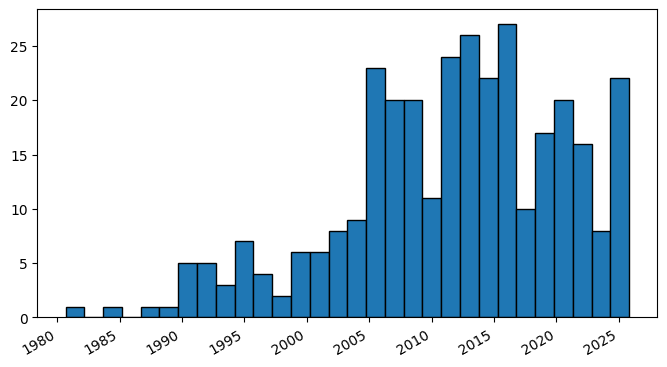

In [22]:
fig, ax = plt.subplots()
plt.hist(matplotlib_dates, bins=30,edgecolor='black')
# set_size specifies the size of the graph
fig.set_size_inches(8, 4)
# Rotate and right-align the x labels so they don't crowd each other
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
plt.show()

### Frequency of Publication for an Author Search

In [23]:
params = {
    'db': 'pubmed',
    'term': 'Reed LK[au]',
    'retmode': 'json',
    'usehistory': 'y',
    'sort': 'pub date',
    'retmax': 500
}

try:
    response = requests.get(ESEARCH_URL, params=params)
    # Raise an error for bad responses
    response.raise_for_status()  
    data = response.json()
    ids = data["esearchresult"]["idlist"]
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")
    data = None
    ids = []

In [24]:
len(ids)

109

In [25]:
pub_dates=[]
for id in ids:
    params = {
        'db': 'pubmed',
        'id': id,
        'retmode': 'json'
    }
    try:
        response = requests.get(ESUMMARY_URL, params=params)
        # Add a delay between API calls
        sleep(.5) 
        # Raise an error for bad responses
        response.raise_for_status()  
        data = response.json()
        pub_dates.append(data["result"][str(id)]["sortpubdate"][0:10])
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        data = None

In [26]:
matplotlib_dates = []
for date in pub_dates:
    # Convert to datetime object
    date = datetime.strptime(date, '%Y/%m/%d')
    # Convert to matplotlib date format
    matplotlib_dates.append(date)
pprint(matplotlib_dates[0:10])

[datetime.datetime(2025, 11, 11, 0, 0),
 datetime.datetime(2025, 11, 1, 0, 0),
 datetime.datetime(2025, 10, 24, 0, 0),
 datetime.datetime(2025, 9, 24, 0, 0),
 datetime.datetime(2025, 9, 15, 0, 0),
 datetime.datetime(2025, 9, 14, 0, 0),
 datetime.datetime(2025, 9, 14, 0, 0),
 datetime.datetime(2025, 9, 11, 0, 0),
 datetime.datetime(2025, 9, 11, 0, 0),
 datetime.datetime(2025, 8, 18, 0, 0)]


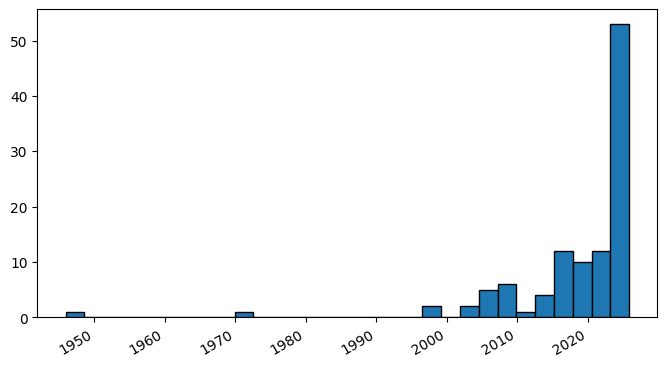

In [27]:
fig, ax = plt.subplots()
plt.hist(matplotlib_dates, bins=30,edgecolor='black')
fig.set_size_inches(8, 4)
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
plt.show()